In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Utilize the sales data set
sales_df=pd.read_excel("SaleData.xlsx")

In [3]:
#1
sales_df.groupby(["Item"])["Sale_amt"].min().reset_index()

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


In [4]:
#2
Year=sales_df.OrderDate.dt.year
sales_df.groupby([sales_df.OrderDate.dt.year,'Region']).Sale_amt.sum()

OrderDate  Region 
2018       Central    479825.0
           East       293780.0
           West       105424.0
2019       Central    349944.5
           East        27227.0
           West        49475.0
Name: Sale_amt, dtype: float64

In [5]:
#3
sales_df['days_diff']=sales_df['OrderDate'].apply(lambda x: (datetime.now()-x).days)
sales_df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,738
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,721
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,704
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,687
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,670


In [6]:
#4
manager=list(set(sales_df.Manager))
list_of_salesman={}
for i in manager:
    list_of_salesman[i]=[]
    for j in range(len(sales_df)):
        if sales_df.Manager[j]==i:
            list_of_salesman[i].append(sales_df.SalesMan[j])
    list_of_salesman[i]=list(set(list_of_salesman[i]))
sales_df1=pd.DataFrame.from_dict(list_of_salesman,orient='index')
sales_df1.head()

,0,1,2
Timothy,Stephen,David,None
Martha,Steven,Alexander,Diana
Hermann,Sigal,Shelli,Luis
Douglas,John,Karen,Michael


In [7]:
#5
sales_df2=sales_df.groupby('Region').Sale_amt.sum()
sales_df3=sales_df.groupby('Region').SalesMan.nunique()
sales_df4=pd.DataFrame(pd.concat([sales_df2,sales_df3],axis=1))
sales_df4=sales_df4.rename(columns={"Sale_amt":"Total_Sales","SalesMan":"SalesMan_count"})
sales_df4.head()

,Total_Sales,SalesMan_count
Region,,
Central,829769.5,6
East,321007.0,3
West,154899.0,2


In [8]:
#6
q10=pd.DataFrame(sales_df.groupby('Manager').Sale_amt.sum().reset_index())
q10=q10.rename(columns={"Sale_amt":"Percent_sales"})
q10

,Manager,Percent_sales
0,Douglas,239056.0
1,Hermann,365108.5
2,Martha,472493.0
3,Timothy,229018.0


In [3]:
#Utilize the imdb data set 
movie_df=pd.read_csv("movie_metadata.csv")

In [10]:
#7
movie_df.imdb_score[4]

7.1

In [11]:
#8
print(movie_df.movie_title[movie_df['duration'].idxmax()])
print(movie_df.movie_title[movie_df['duration'].idxmin()])

Trapped             
Shaun the Sheep             


In [12]:
#9
movie_df.sort_values(by=['title_year', 'imdb_score'], ascending=[True, False])

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4810,Black and White,D.W. Griffith,69.0,123.0,204.0,9.0,Mae Marsh,436.0,NaN,Drama|History|War,...,88.0,NaN,USA,Not Rated,385907.0,1916.0,22.0,8.0,1.33,691
4958,Black and White,Harry F. Millarde,1.0,110.0,0.0,0.0,Johnnie Walker,2.0,3000000.0,Crime|Drama,...,1.0,NaN,USA,NaN,100000.0,1920.0,2.0,4.8,1.33,0
4885,Black and White,King Vidor,48.0,151.0,54.0,6.0,Renée Adorée,81.0,NaN,Drama|Romance|War,...,45.0,NaN,USA,Not Rated,245000.0,1925.0,12.0,8.3,1.33,226
2734,Black and White,Fritz Lang,260.0,145.0,756.0,18.0,Gustav Fröhlich,136.0,26435.0,Drama|Sci-Fi,...,413.0,German,Germany,Not Rated,6000000.0,1927.0,23.0,8.3,1.33,12000
4664,Black and White,Georg Wilhelm Pabst,71.0,110.0,21.0,3.0,Francis Lederer,426.0,9950.0,Crime|Drama|Romance,...,84.0,German,Germany,Not Rated,NaN,1929.0,20.0,8.0,1.33,926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Color,NaN,5.0,43.0,NaN,452.0,Aimee Garcia,778.0,NaN,Action|Comedy|Crime,...,30.0,English,USA,TV-14,NaN,NaN,618.0,5.8,16.00,0
4113,Color,NaN,10.0,173.0,NaN,476.0,Colm Feore,723.0,NaN,Horror|Sci-Fi|Thriller,...,33.0,English,USA,NaN,NaN,NaN,539.0,5.0,1.78,518
2191,Color,NaN,3.0,30.0,NaN,295.0,David Mann,607.0,NaN,Comedy,...,20.0,English,USA,NaN,NaN,NaN,378.0,3.5,1.85,211
3303,Color,NaN,1.0,30.0,NaN,140.0,Katherine Kelly Lang,177.0,NaN,Drama|Romance,...,54.0,English,USA,TV-14,NaN,NaN,170.0,3.5,1.78,748


In [14]:
#10
movie_df1=movie_df.loc[(movie_df['duration'] >= 30) & (movie_df['duration'] <= 180) & (movie_df['budget']<1000000) & (movie_df['gross']>2000000)]
movie_df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0
3821,Color,Billy Bob Thornton,104.0,148.0,0.0,263.0,Dwight Yoakam,3000.0,24475416.0,Drama,...,309.0,English,USA,R,890000.0,1996.0,324.0,8.0,1.85,0


In [17]:
# Utilize the diamonds data set
diamonds_df=pd.read_csv("diamonds.csv")

In [18]:
#11
diamonds_df1=pd.DataFrame(diamonds_df)
dupl=len(diamonds_df1)-len(diamonds_df1.drop_duplicates())
dupl

149

In [19]:
#12
diamonds_df2=pd.DataFrame(diamonds_df.dropna(how='any',subset=['carat','cut']))
diamonds_df2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [20]:
#13
diamonds_df3=diamonds_df._get_numeric_data()
diamonds_df3.head()

,depth,table,price,x,y
0,61.5,55.0,326.0,3.95,3.98
1,59.8,61.0,326.0,3.89,3.84
2,56.9,65.0,327.0,4.05,4.07
3,62.4,58.0,334.0,4.20,4.23
4,63.3,58.0,335.0,4.34,4.35


In [21]:
#14
diamonds_df.loc[diamonds_df['depth'] > 60, 'volume'] = diamonds_df['x']*diamonds_df['y']*pd.to_numeric(diamonds_df['z'],errors='coerce')
diamonds_df.loc[diamonds_df['depth'] <= 60, 'volume'] = 8 
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


In [22]:
#15
diamonds_df['price'].fillna(value=diamonds_df['price'].mean(),inplace=True)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


In [18]:
#Bonus questions 

In [38]:
imdb_df=pd.read_csv("imdb.csv",escapechar="\\")

In [39]:
#1
imdb_df1=imdb_df.groupby('year').sum().reset_index()
imdb_df2=pd.DataFrame(imdb_df1)
imdb_df2.drop(imdb_df2.columns[0:10],axis=1,inplace=True)
imdb_df2['Genre_combo']=imdb_df2.apply(lambda x: "|".join(x.index[x>=1]),axis=1)
imdb_df2.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sport,TalkShow,Thriller,War,Western,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Genre_combo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Short
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Comedy|Romance|Short
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,Short|Western
3,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Drama|Romance|Short
4,0,0,0,0,0,0,2,0,2,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,Crime|Drama|Short


In [41]:
imdb_df3=pd.DataFrame(imdb_df1.year)
imdb_df3['type']=imdb_df["type"].str.split(".", n = 1, expand = True)[1]
imdb_df3['Genre_combo']=imdb_df2['Genre_combo']
imdb_df4=imdb_df.groupby('year').agg({'imdbRating': ['mean','min', 'max'],'duration':['sum']}).reset_index()
imdb_df4.columns=['year','avg_rating','min_rating','max_rating','total_run_time_mins ']
res=pd.merge(imdb_df3,imdb_df4,how='inner',on='year')
res.head()

,year,type,Genre_combo,avg_rating,min_rating,max_rating,total_run_time_mins
0,1893.0,movie,Short,6.3,6.3,6.3,60.0
1,1899.0,movie,Comedy|Romance|Short,5.9,5.9,5.9,60.0
2,1903.0,movie,Short|Western,7.4,7.4,7.4,660.0
3,1911.0,movie,Drama|Romance|Short,6.6,6.6,6.6,1020.0
4,1913.0,movie,Crime|Drama|Short,6.7,6.6,6.8,9300.0


In [43]:
#2
imdb_df['title_len']=imdb_df.title.str.len()
imdb_df[['title_len','imdbRating']].corr(method="spearman")

,title_len,imdbRating
title_len,1.000000,0.097972
imdbRating,0.097972,1.000000


In [45]:
imdb_df5=pd.DataFrame(imdb_df.groupby('year')['title_len'].sum().dropna().reset_index())
imdb_df5.set_index('year',inplace=True)

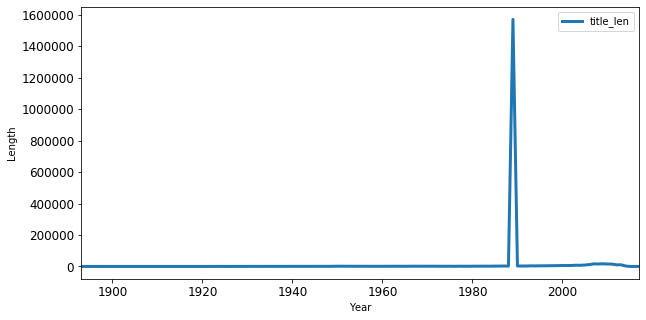

In [33]:
imdb_df5.plot(figsize=(10,5), linewidth=3, fontsize=12)
plt.xlabel('Year', fontsize=10);
plt.ylabel('Length',fontsize=10);

In [47]:
imdb_df6=imdb_df.groupby('year')['title_len'].agg([('min_length','min'),('max_length','max')]).reset_index()
imdb_df7=pd.DataFrame(imdb_df.year)
imdb_df7['a']=(imdb_df.title_len < imdb_df.title_len.quantile(.25)).astype(np.int64)
imdb_df7['b']=(imdb_df.title_len >= imdb_df.title_len.quantile(.25)) & (imdb_df.title_len < imdb_df.title_len.quantile(.50)).astype(np.int64)
imdb_df7['c']=(imdb_df.title_len >= imdb_df.title_len.quantile(.50)) & (imdb_df.title_len < imdb_df.title_len.quantile(.75)).astype(np.int64)
imdb_df7['d']=imdb_df.title_len >= imdb_df.title_len.quantile(.75).astype(np.int64)
imdb_df7.columns=['year','num_videos_less_than25Percentile','num_videos_25_50Percentile','num_videos_50_75Percentile','num_videos_greaterthan75Precentile']
imdb_df8=imdb_df7.groupby('year').sum().reset_index()
res=pd.merge(imdb_df6, imdb_df8, how ='inner', on ='year')
res.head()

,year,min_length,max_length,num_videos_less_than25Percentile,num_videos_25_50Percentile,num_videos_50_75Percentile,num_videos_greaterthan75Precentile
0,1893.0,23,23,0,1.0,0.0,0.0
1,1899.0,29,29,0,1.0,0.0,0.0
2,1903.0,30,30,0,0.0,1.0,0.0
3,1911.0,22,28,0,2.0,0.0,0.0
4,1913.0,25,44,0,2.0,0.0,1.0


In [23]:
#3
diamonds_df['bins'] = pd.qcut(diamonds_df['volume'], q=6,precision=0)
diamonds_df3=pd.crosstab(diamonds_df.dropna().bins.astype(str), diamonds_df.cut, margins=False)
df_row_sum=diamonds_df3.apply(lambda r: r/r.sum(), axis=1)
df_col_sum=diamonds_df3.apply(lambda r: r/r.sum(), axis=0)
df_row_sum.head()

cut,Fair,Good,Ideal,Premium,Very Good
bins,,,,,
"(-1.0, 50.0]",0.030754,0.131897,0.196958,0.331520,0.308871
"(146.0, 188.0]",0.045945,0.109022,0.328401,0.274447,0.242185
"(188.0, 839.0]",0.038269,0.073201,0.347981,0.330960,0.209589
"(50.0, 65.0]",0.002563,0.053705,0.587187,0.214819,0.141727
"(65.0, 93.0]",0.015915,0.075348,0.529549,0.194101,0.185086


In [24]:
df_col_sum.head()

cut,Fair,Good,Ideal,Premium,Very Good
bins,,,,,
"(-1.0, 50.0]",0.172050,0.242202,0.082328,0.216518,0.230260
"(146.0, 188.0]",0.256522,0.199796,0.136996,0.178885,0.180185
"(188.0, 839.0]",0.213665,0.134149,0.145164,0.215720,0.155934
"(50.0, 65.0]",0.014286,0.098267,0.244570,0.139801,0.105281
"(65.0, 93.0]",0.088820,0.138022,0.220809,0.126459,0.137643


In [4]:
#4
moviedf1=movie_df.groupby('title_year')['gross'].sum().reset_index()
moviedf1['10']=moviedf1['gross']*0.1
moviedf1.drop(moviedf1.columns[1:2],axis=1,inplace=True)
movie_df=pd.merge(movie_df,moviedf1,how='inner',on='title_year')
movie_df.loc[movie_df['gross'] >= movie_df['10'],'avg_score'] = movie_df['imdb_score']
movie_df.loc[movie_df['gross'] < movie_df['10'],'avg_score'] = 0
moviedf2=movie_df.groupby('title_year')['avg_score'].mean().reset_index()
moviedf2.head(10)

,title_year,avg_score
0,1916.0,NaN
1,1920.0,4.80
2,1925.0,NaN
3,1927.0,8.30
4,1929.0,3.15
5,1930.0,NaN
6,1932.0,NaN
7,1933.0,7.70
8,1934.0,NaN
9,1935.0,7.80


In [49]:
#5
imdb_df['decile'] = pd.qcut(imdb_df['duration'], 10, labels=False)
data=pd.DataFrame(imdb_df)
data.drop(data.columns[0:10],axis=1,inplace=True)
data.drop(data.columns[2:6],axis=1,inplace=True)
test1 = data.groupby('decile', sort=True).sum().reset_index()
test_2=test1.drop(test1.columns[4:],axis=1)
test_2.decile=test_2.decile.astype(np.int64)
test_2['count']=imdb_df.groupby('decile').size().astype(np.int64) 
test_3=test1.drop(test1.columns[1:4],axis=1)
test_4 = test_3.set_index('decile')
test_4 = pd.DataFrame(test_3.columns.values[np.argsort(-test_3.values, axis=1)[:, :3]], index=test_3.index,columns = ['1st Max','2nd Max','3rd Max']).reset_index()
test_4.columns = ['decile', '1st Max', '2nd Max', '3rd Max']
res=pd.merge(test_2, test_4, how ='inner', on ='decile')
res.drop(res.columns[1:2],axis=1,inplace=True)
res

,decile,nrOfNominations,Action,count,1st Max,2nd Max,3rd Max
0,0,2162,38,1093,title_len,Comedy,Short
1,1,5635,84,670,title_len,Drama,Comedy
2,2,615,33,487,title_len,Comedy,Drama
3,3,2067,101,816,title_len,Comedy,Drama
4,4,2511,102,760,title_len,Comedy,Drama
5,5,3262,125,691,title_len,Drama,Comedy
6,6,3995,169,760,title_len,Drama,Comedy
7,7,5374,165,792,title_len,Drama,Comedy
8,8,6661,163,683,title_len,Drama,Adventure
9,9,8283,154,728,title_len,Drama,Adventure


In [15]:
movie_df2=pd.concat([movie_df['title_year'], movie_df['gross']], axis=1)
movie_df2.groupby(pd.cut(movie_df2['title_year'], np.arange(movie_df2['title_year'].min(), movie_df2['title_year'].max()+1, 10)))['gross'].sum().reset_index()

,title_year,gross
0,"(1916.0, 1926.0]",3.000000e+06
1,"(1926.0, 1936.0]",8.307630e+06
2,"(1936.0, 1946.0]",7.133305e+08
3,"(1946.0, 1956.0]",9.783299e+07
4,"(1956.0, 1966.0]",8.608456e+08
5,"(1966.0, 1976.0]",1.942975e+09
6,"(1976.0, 1986.0]",9.104971e+09
7,"(1986.0, 1996.0]",2.241681e+10
8,"(1996.0, 2006.0]",7.306753e+10
9,"(2006.0, 2016.0]",9.336346e+10


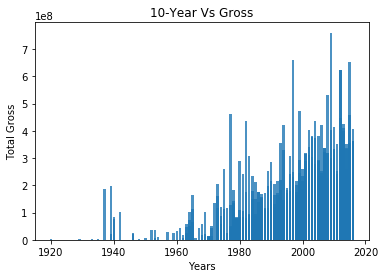

In [16]:
x=movie_df2['title_year']
y=movie_df2['gross']
plt.bar(x,y, alpha=0.8)
plt.ylabel('Total Gross');
plt.xlabel('Years')
plt.title('10-Year Vs Gross')
plt.show()

In [67]:
imdb_df9=pd.concat([imdb_df['imdbRating'], imdb_df['nrOfWins']], axis=1)
imdb_df9.groupby(pd.cut(imdb_df9['imdbRating'], np.arange(imdb_df['imdbRating'].min(), imdb_df9['imdbRating'].max()+1, 1)))['nrOfWins'].sum().reset_index()

,imdbRating,nrOfWins
0,"(1.0, 2.0]",3
1,"(2.0, 3.0]",19
2,"(3.0, 4.0]",42
3,"(4.0, 5.0]",147
4,"(5.0, 6.0]",871
5,"(6.0, 7.0]",3967
6,"(7.0, 8.0]",16025
7,"(8.0, 9.0]",8412
8,"(9.0, 10.0]",345


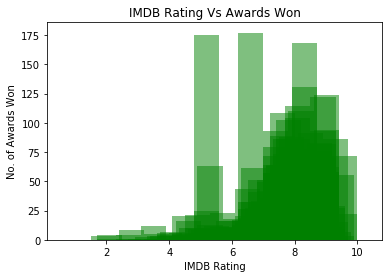

In [68]:
x=imdb_df9['imdbRating']
y=imdb_df9['nrOfWins']
plt.bar(x,y,color='green',alpha=0.5)
plt.ylabel('No. of Awards Won');
plt.xlabel('IMDB Rating');
plt.title('IMDB Rating Vs Awards Won')
plt.show()